# <center><font color=magenta>CNN Convolutional Neural Networks in Keras:</font> MNIST Example</center>

### Machine Learning LAB
### *ETSIT - UPM*
---
---

* ## This Notebook is a modified version of
[Introduction to Deep Learning with Keras and TensorFlow](https://colab.research.google.com/github/AviatorMoser/keras-mnist-tutorial/blob/master/MNIST%20in%20Keras.ipynb)


**Daniel Moser (UT Southwestern Medical Center)**

**Resources: [Xavier Snelgrove](https://github.com/wxs/keras-mnist-tutorial), [Yash Katariya](https://github.com/yashk2810/MNIST-Keras)**

In [2]:
# This is to make plots visible in the Notebook
%matplotlib inline

## The Task for the AI

Our goal is to construct and train an artificial neural network on thousands of images of handwritten digits so that it may successfully identify others when presented. The data that will be incorporated is the MNIST database which contains 60,000 images for training and 10,000 test images. We will use the Keras Python API with TensorFlow as the backend.

<img src="https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/mnist.png?raw=1" >

## Prerequisite Python Modules

First, some software needs to be loaded into the Python environment.

In [3]:
import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers

from keras.utils import np_utils                         # NumPy related tools

# Introducing Convolution! What is it?

Before, we built a network that accepts the normalized pixel values of each value and operates soley on those values. What if we could instead feed different features (e.g. **curvature, edges**) of each image into a network, and have the network learn which features are important for classifying an image?

This possible through convolution! Convolution applies **kernels** (filters) that traverse through each image and generate **feature maps**.

<img src = 'https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/convolution.gif?raw=1' >

In the above example, the image is a 5 x 5 matrix and the kernel going over it is a 3 x 3 matrix. A dot product operation takes place between the image and the kernel and the convolved feature is generated. Each kernel in a CNN learns a different characteristic of an image.

Kernels are often used in photoediting software to apply blurring, edge detection, sharpening, etc.

<img src = 'https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/kernels.png?raw=1' >

Kernels in deep learning networks are used in similar ways, i.e. highlighting some feature. Combined with a system called **max pooling**, the non-highlighted elements are discarded from each feature map, leaving only the features of interest, reducing the number of learned parameters, and decreasing the computational cost (e.g. system memory).

<img src = 'https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/max_pooling.png?raw=1' >

We can also take convolutions of convolutions -- we can stack as many convolutions as we want, as long as there are enough pixels to fit a kernel.

*Warning: What you may find down there in those deep convolutions may not appear recognizable to you.*

## Building a "Deep" Convolutional Neural Network using [Keras](https://keras.io/)

<img src="https://keras.io/img/logo.png" width="300" height="100" />

#### You can learn Keras and follow many examplies in [Keras Web](https://keras.io)

In [4]:
# import some additional tools

from keras.preprocessing.image import ImageDataGenerator

from keras.datasets import mnist     # MNIST dataset is included in Keras
from keras.models import Sequential  # Model type to be used

from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
from keras.layers import BatchNormalization

In [5]:
# Load the MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [6]:
# Again, do some formatting
# Except we do not flatten each image into a 784-length vector because we want to perform convolutions first

X_train = X_train.reshape(60000, 28, 28, 1) #add an additional dimension to represent the single-channel
X_test = X_test.reshape(10000, 28, 28, 1)

X_train = X_train.astype('float32')         # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                              # normalize each value for each pixel for the entire vector for each input
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)


In [7]:
# one-hot format classes

nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

### As in the Feed-Forward example the easiest way to design a Deep Learning Model in Keras is the [Sequential model](https://keras.io/guides/sequential_model/):
* you have just to define a plain stack of layers where each layer has exactly one input tensor and one output tensor.

In [8]:
model = Sequential()                                 # Linear stacking of layers

# Convolution Layer 1
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1))) # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer01 = Activation('relu')                     # activation
model.add(convLayer01)

# Convolution Layer 2
model.add(Conv2D(32, (3, 3)))                        # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer02 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer02)

# Convolution Layer 3
model.add(Conv2D(64,(3, 3)))                         # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer03 = Activation('relu')                     # activation
model.add(convLayer03)

# Convolution Layer 4
model.add(Conv2D(64, (3, 3)))                        # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer04 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer04)
model.add(Flatten())                                 # Flatten final 4x4x64 output matrix into a 1024-length vector

# Fully Connected Layer 5
model.add(Dense(512))                                # 512 FCN nodes
model.add(BatchNormalization())                      # normalization
model.add(Activation('relu'))                        # activation

# Fully Connected Layer 6                       
model.add(Dropout(0.2))                              # 20% dropout of randomly selected nodes
model.add(Dense(10))                                 # final 10 FCN nodes
model.add(Activation('softmax'))                     # softmax activation

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 26, 26, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 24, 24, 32)        0

In [10]:
# we'll use the same optimizer

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
# data augmentation prevents overfitting by slightly changing the data randomly
# Keras has a great built-in feature to do automatic augmentation

gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

### NOTE: <font color=yellow>*Deprecated*</font>: tf.keras.preprocessing.image.ImageDataGenerator is not recommended for new code. 

> Prefer loading images with tf.keras.utils.image_dataset_from_directory and transforming the output tf.data.Dataset with preprocessing layers. For more information, see the tutorials for loading images and augmenting images, as well as the preprocessing layer guide.

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator 

In [13]:
# We can then feed our augmented data in batches
# Besides loss function considerations as before, this method actually results in significant memory savings
# because we are actually LOADING the data into the network in batches before processing each batch

# Before the data was all loaded into memory, but then processed in batches.

train_generator = gen.flow(X_train, Y_train, batch_size=128)
test_generator = test_gen.flow(X_test, Y_test, batch_size=128)

### NOTE: when using ImageDataGeneration we don't generate more data, it is in every batch and epoch that different (transformed) images are used. 

In [15]:
# We can now train our model which is fed data by our batch loader
# Steps per epoch should always be total size of the set divided by the batch size

# SIGNIFICANT MEMORY SAVINGS (important for larger, deeper networks)

model.fit(train_generator, steps_per_epoch=60000//128, epochs=5, verbose=1, 
                    validation_data=test_generator, validation_steps=10000//128)

Epoch 1/5
468/468 [==============================] - 20s 42ms/step - loss: 0.0487 - accuracy: 0.9855 - val_loss: 0.0709 - val_accuracy: 0.9771
Epoch 2/5
468/468 [==============================] - 19s 41ms/step - loss: 0.0396 - accuracy: 0.9877 - val_loss: 0.0333 - val_accuracy: 0.9886
Epoch 3/5
468/468 [==============================] - 20s 43ms/step - loss: 0.0330 - accuracy: 0.9897 - val_loss: 0.0227 - val_accuracy: 0.9933
Epoch 4/5
468/468 [==============================] - 19s 41ms/step - loss: 0.0294 - accuracy: 0.9909 - val_loss: 0.0193 - val_accuracy: 0.9935
Epoch 5/5
468/468 [==============================] - 20s 42ms/step - loss: 0.0290 - accuracy: 0.9905 - val_loss: 0.0412 - val_accuracy: 0.9872


In [ ]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.0331 - accuracy: 0.9894
Test score: 0.033086247742176056
Test accuracy: 0.9894000291824341


### Confusion Matrix

In [ ]:
! pip install pycm

313/313 [==============================] - 1s 3ms/step


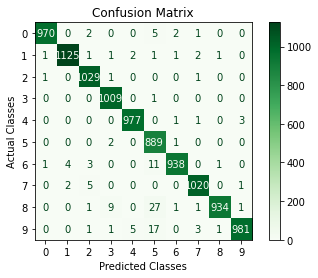

In [18]:
from pycm import *

# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict(X_test)

cm = ConfusionMatrix(actual_vector=y_test, predict_vector=np.argmax(predicted_classes,axis=1)) # Create CM From Data

cm.plot(cmap=plt.cm.Greens,number_label=True,plot_lib="matplotlib")

## Convolutions visualization

But wouldn't it be nice if we could visualize those convolutions so that we can see what the model is seeing?

### Visualize Feature Maps directly from CNN layers

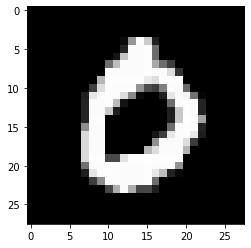

In [19]:
# Choose one image to test

img_num = 3
img = X_test[img_num]

plt.figure()
plt.imshow(X_test[3].reshape(28,28), cmap='gray', interpolation='none')

In [21]:
# redefine model to output right after the first hidden layer
from keras.models import Model

layer_outputs = [layer.output for layer in model.layers]
feature_map_model = Model(inputs=model.input, outputs=layer_outputs)

img = X_test[img_num]
img = np.expand_dims(img, axis=0)

feature_maps = feature_map_model.predict(img)

layer_outputs

1/1 [==============================] - 0s 227ms/step


[<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv2d')>,
 <KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'batch_normalization')>,
 <KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'activation')>,
 <KerasTensor: shape=(None, 24, 24, 32) dtype=float32 (created by layer 'conv2d_1')>,
 <KerasTensor: shape=(None, 24, 24, 32) dtype=float32 (created by layer 'batch_normalization_1')>,
 <KerasTensor: shape=(None, 24, 24, 32) dtype=float32 (created by layer 'activation_1')>,
 <KerasTensor: shape=(None, 12, 12, 32) dtype=float32 (created by layer 'max_pooling2d')>,
 <KerasTensor: shape=(None, 10, 10, 64) dtype=float32 (created by layer 'conv2d_2')>,
 <KerasTensor: shape=(None, 10, 10, 64) dtype=float32 (created by layer 'batch_normalization_2')>,
 <KerasTensor: shape=(None, 10, 10, 64) dtype=float32 (created by layer 'activation_2')>,
 <KerasTensor: shape=(None, 8, 8, 64) dtype=float32 (created by layer 'conv2d_3')>,
 <Kera

In [22]:
layer_names=[layer.name for layer in model.layers]

Layer no. 3 Shape : (1, 24, 24, 32)


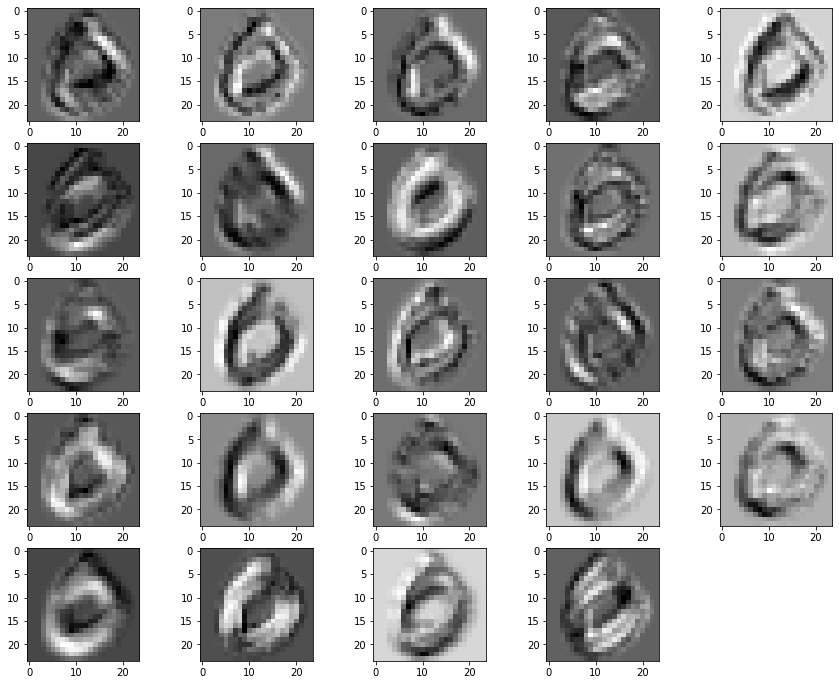

In [26]:
layer_to_visualize = 'conv2d_1'
layer_index = index = layer_names.index(layer_to_visualize)

layer_index

print ('Layer no.' , layer_index, 'Shape :', feature_maps[layer_index].shape)
    
m = feature_maps[layer_index].shape[2]
n = int(np.ceil(np.sqrt(m)))

# Visualization of each filter of the layer
fig = plt.figure(figsize=(15,12))
for i in range(m):
        ax = fig.add_subplot(n,n,i+1)
        ax.imshow(feature_maps[layer_index][0,:,:,i], cmap='gray')